<a href="https://colab.research.google.com/github/air4bball/361Projects/blob/main/CS361HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

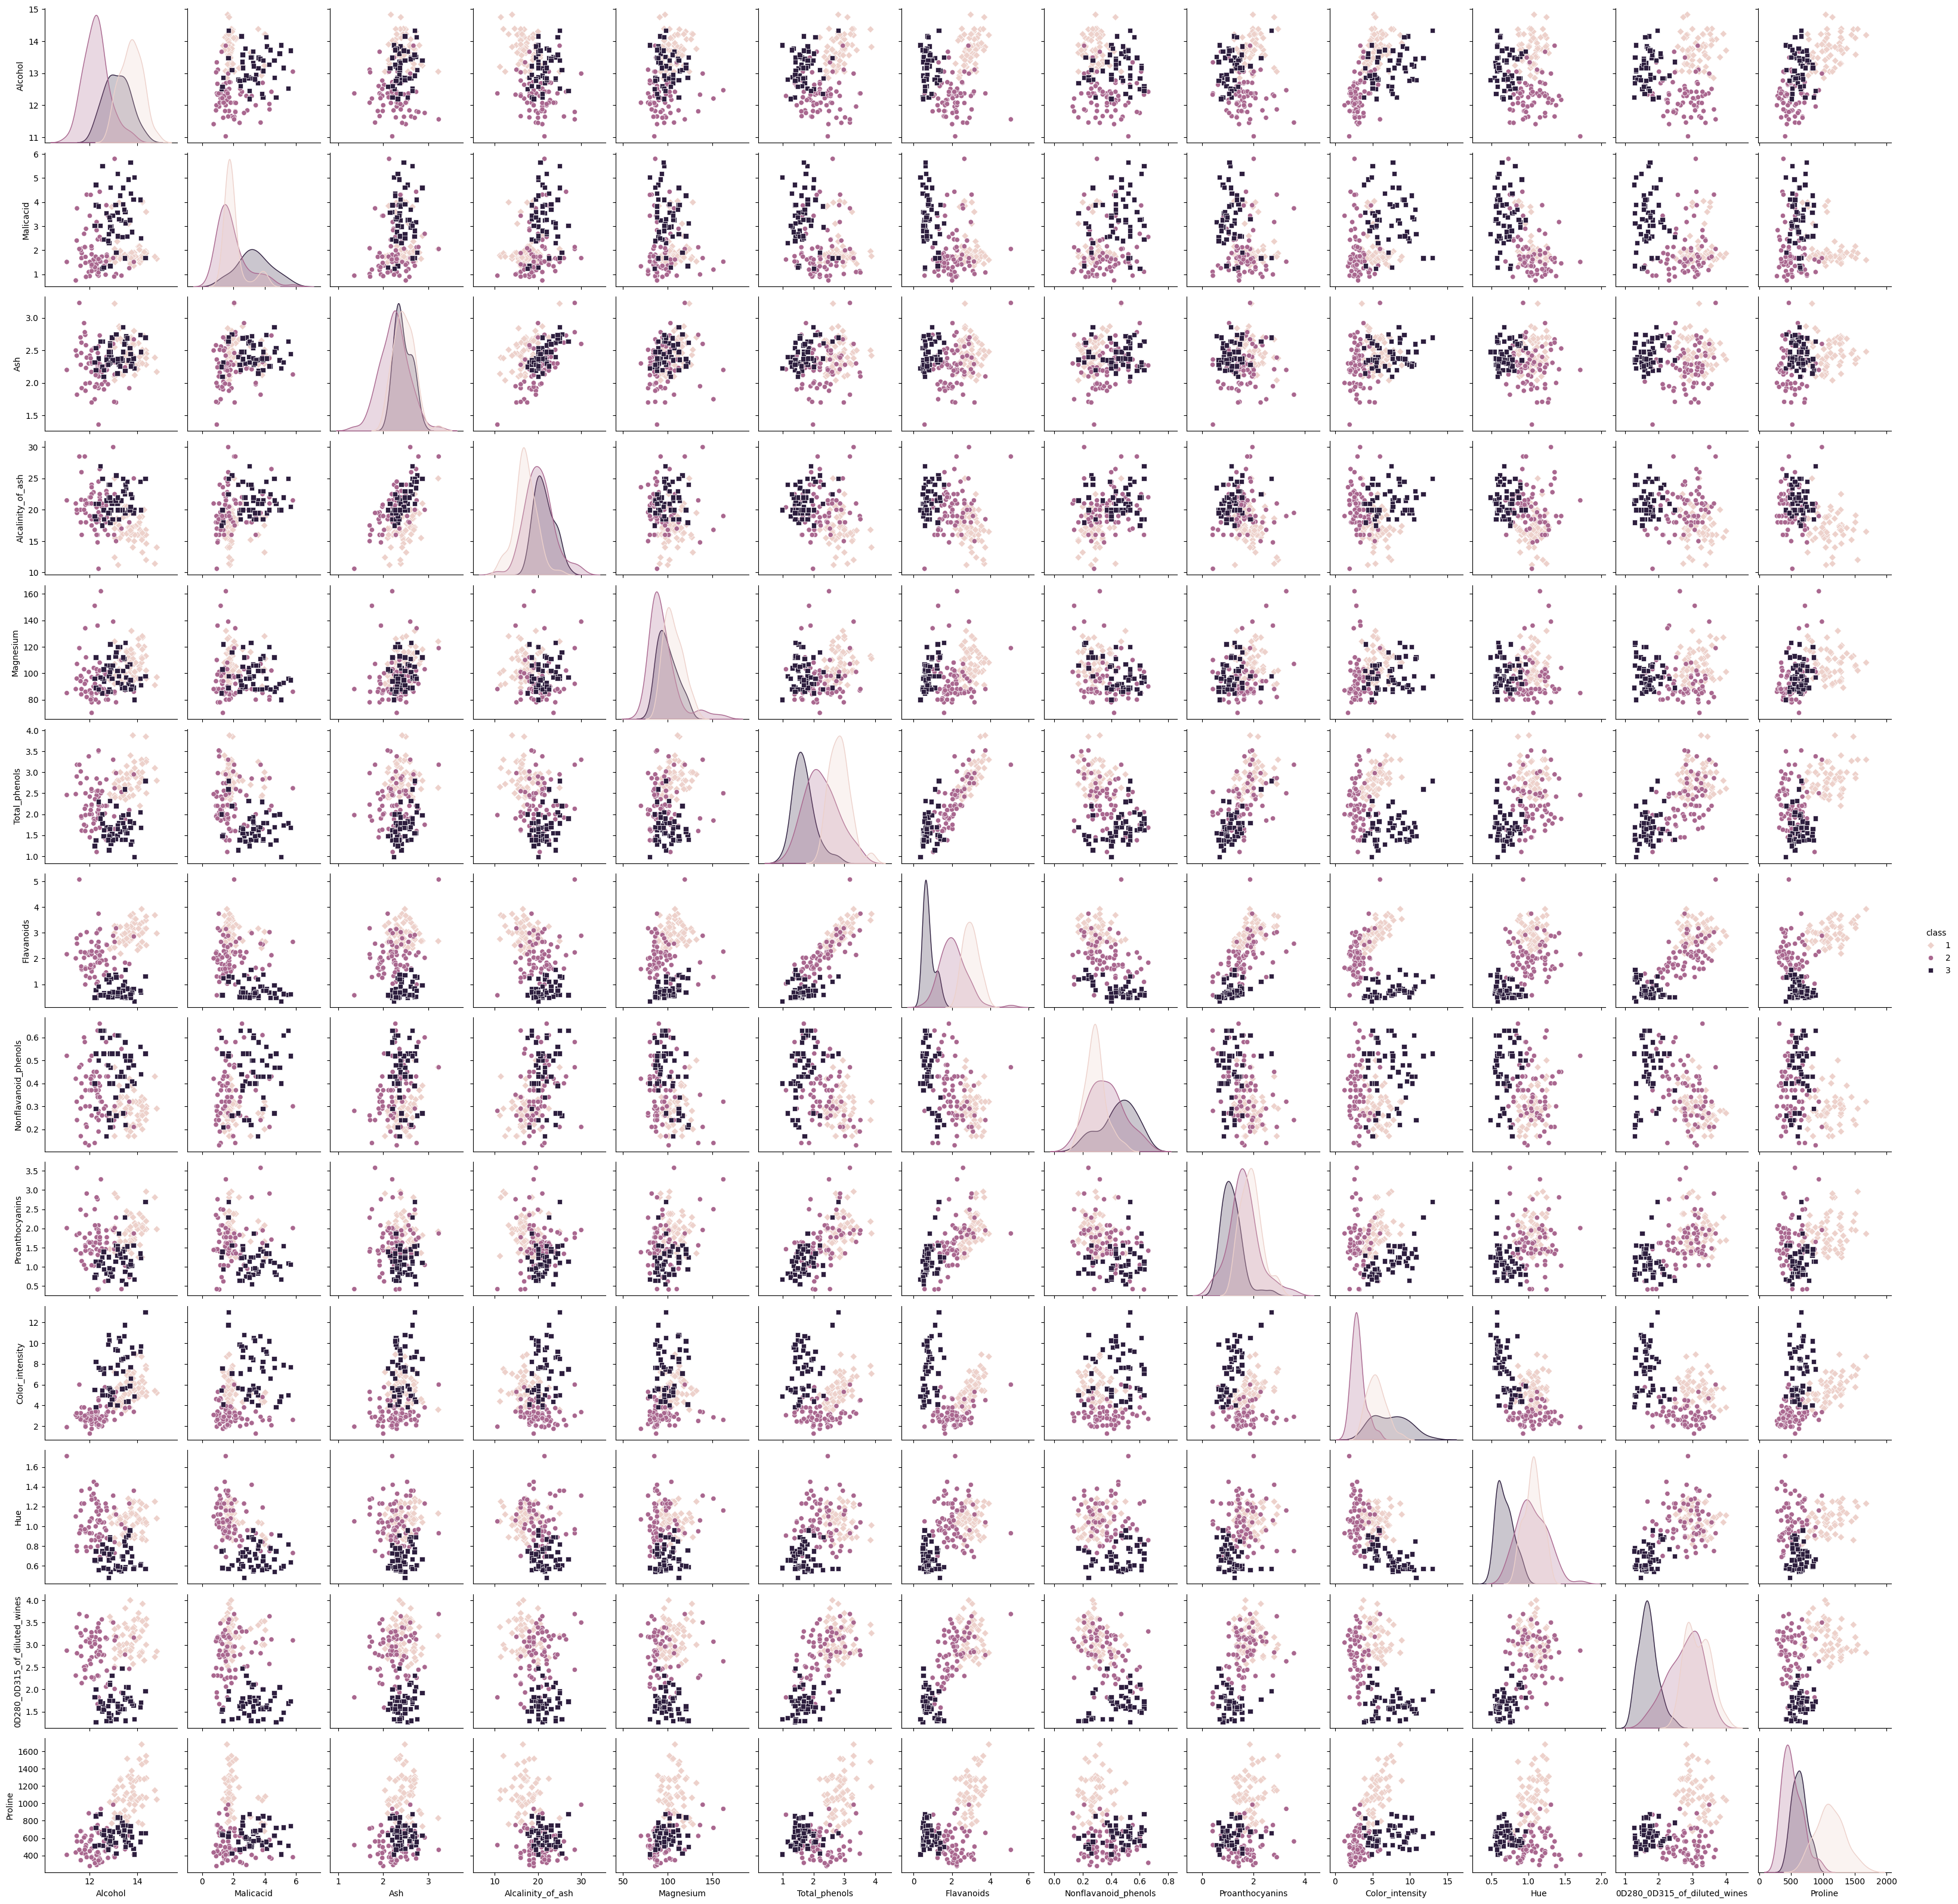

In [ ]:
import pandas as pd
import seaborn as sns

Xy = pd.concat([X, y], axis=1)

sns.pairplot(Xy, hue="class", markers=['D', 'o', 's'])

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

features = Xy.filter(['Alcohol', 'Malicacid',	'Ash',	'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline'])
features = StandardScaler().fit_transform(features)
cov_mat = np.cov(features.T)
cov_mat


array([[ 1.00564972,  0.09493026,  0.21273976, -0.31198788,  0.27232816,
         0.29073446,  0.23815287, -0.15681042,  0.13747022,  0.549451  ,
        -0.07215255,  0.07275191,  0.64735687],
       [ 0.09493026,  1.00564972,  0.16497228,  0.29013035, -0.05488343,
        -0.3370606 , -0.41332866,  0.29463237, -0.22199334,  0.25039204,
        -0.56446685, -0.37079354, -0.19309537],
       [ 0.21273976,  0.16497228,  1.00564972,  0.44587209,  0.28820583,
         0.12970824,  0.11572743,  0.1872826 ,  0.00970647,  0.2603499 ,
        -0.07508874,  0.00393333,  0.22488969],
       [-0.31198788,  0.29013035,  0.44587209,  1.00564972, -0.0838039 ,
        -0.32292752, -0.353355  ,  0.36396647, -0.19844168,  0.01883781,
        -0.27550299, -0.27833221, -0.44308618],
       [ 0.27232816, -0.05488343,  0.28820583, -0.0838039 ,  1.00564972,
         0.21561254,  0.19688989, -0.25774204,  0.23777643,  0.20107967,
         0.05571118,  0.06637684,  0.39557317],
       [ 0.29073446, -0.337060

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

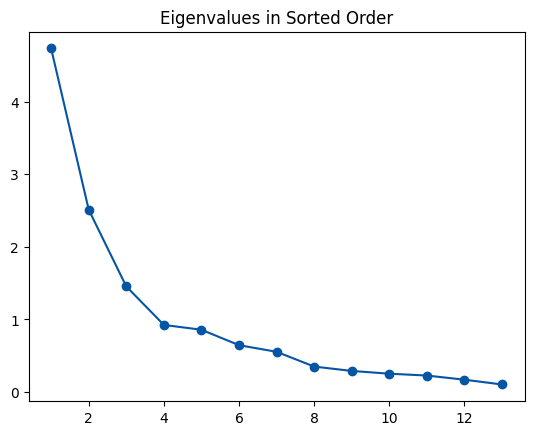

In [ ]:
import matplotlib.pyplot as plt

eigenvals, eigenvecs = np.linalg.eig(cov_mat)

idx = np.argsort(eigenvals)[::-1]
eigenvals = eigenvals[idx]
eigenvecs = eigenvecs[:, idx]

plt.plot(np.arange(1,14), eigenvals, color='#0455A4', marker='o', linestyle='-')
plt.title('Eigenvalues in Sorted Order')
eigenvals

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(features)
df_pca = pd.DataFrame(data = principalComponents, columns=['PC1', 'PC2'])
df_pca.head()

,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [ ]:
wine_joined = pd.concat([df_pca, Xy['class']], axis=1)
wine_joined.head()

,PC1,PC2,class
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1


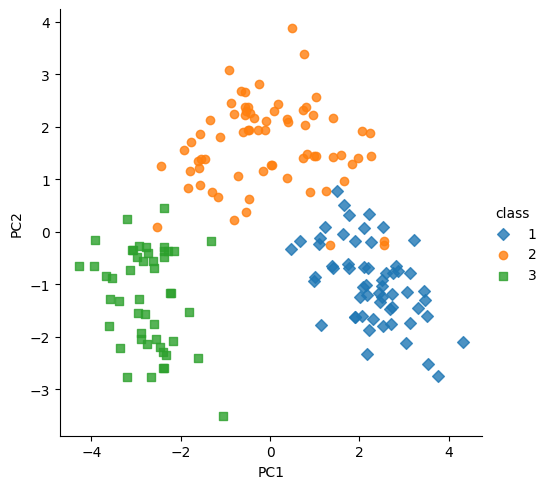

In [ ]:
sns.lmplot(x='PC1', y='PC2', data=wine_joined, fit_reg=False, hue="class", markers=['D','o','s'])

10.6


In [ ]:
import pandas as pd

seeds = pd.read_csv('/content/drive/MyDrive/CS 361 HW - seeds_dataset.csv', header = None)
#features = seeds.filter(['0', '1', '2', '3', '4', '5', '6', '7'])

seeds = seeds.select_dtypes(include = 'number')
seeds.iloc[:, :-2]

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0


In [ ]:
from sklearn.decomposition import PCA

features = StandardScaler().fit_transform(features)

pca = PCA(n_components = 2)
seeds_pca = pca.fit_transform(seeds_std)

plt.scatter(seeds_pca[:, 0], seeds_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

ValueError: at least one array or dtype is required

In [ ]:
рса = PCA()
X_pca = pca.fit_transform(seeds_std)
eigenvalues = pca.explained_variance_
plt.plot(np.arange(1, len (eigenvalues) + 1), eigenvalues, marker='o', Linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel ('Eigenvalue')
plt.xticks(np.arange(1, len(eigenvalues) + 1))
plt.show()

TypeError: float() argument must be a string or a real number, not 'set'

In [ ]:
import numpy as np

# Given mean and eigenvectors
mean = np.array([1, 1, 1, 1])
u1 = np.array([0.5, 0.5, 0.5, 0.5])
u2 = np.array([0.5, -0.5, -0.5, 0.5])

# Given item x1
x1 = np.array([3, 3, 5, 7])

# Step 1: Subtract the mean from x1
x1_centered = x1 - mean

# Step 2: Dot product with each eigenvector
proj_u1 = np.dot(x1_centered, u1)
proj_u2 = np.dot(x1_centered, u2)

# The coordinates of the projected point
print("Coordinates of the projected point:")
print("Projection onto u1:", proj_u1)
print("Projection onto u2:", proj_u2)

Coordinates of the projected point:
Projection onto u1: 7.0
Projection onto u2: 1.0
